# <h1><center>Assessmet 5 on Advanced Data Analysis using Pandas</center></h1>

# **Project 3: GDP Rate and Unemployment Rate**

In [19]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

import pandas as pd

In [20]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [38]:
GDP_INDICATOR = 'NY.GDP.MKTP.CD'
gdpReset= pd.read_excel("API_NY.GDP.MKTP.CD.xls")
gdpReset.head()

,Country Name,year,NY.GDP.MKTP.CD
0,Aruba,2019,NaN
1,Afghanistan,2019,1.929110e+10
2,Angola,2019,8.881570e+10
3,Albania,2019,1.527918e+10
4,Andorra,2019,3.154058e+09


In [35]:
gdpReset.tail()

,Country Name,year,NY.GDP.MKTP.CD
259,Kosovo,2019,7.926134e+09
260,"Yemen, Rep.",2019,2.258108e+10
261,South Africa,2019,3.514316e+11
262,Zambia,2019,2.330977e+10
263,Zimbabwe,2019,2.144076e+10


In [23]:
UNEMPLOYMENT_INDICATOR = 'SL.UEM.TOTL.NE.ZS'
UnemployReset= pd.read_excel('API_SL.UEM.TOTL.NE.ZS.xls')
UnemployReset.head()

,Country Name,year,SL.UEM.TOTL.NE.ZS
0,Aruba,2019,NaN
1,Afghanistan,2019,NaN
2,Angola,2019,NaN
3,Albania,2019,11.47
4,Andorra,2019,NaN


In [24]:
UnemployReset.tail()

,Country Name,year,SL.UEM.TOTL.NE.ZS
259,Kosovo,2019,25.559999
260,"Yemen, Rep.",2019,NaN
261,South Africa,2019,28.469999
262,Zambia,2019,NaN
263,Zimbabwe,2019,16.860001


# Cleaning the data


Inspecting the data with head() and tail() shows that:
Some countries are missing for in the two data sets: GDP and Unemployment Rates.
The data is therefore cleaned by removing the rows with unavailable values using the drop() method.

In [25]:
gdpCountries = gdpReset[0:].dropna()
gdpCountries

,Country Name,year,NY.GDP.MKTP.CD
1,Afghanistan,2019,1.929110e+10
2,Angola,2019,8.881570e+10
3,Albania,2019,1.527918e+10
4,Andorra,2019,3.154058e+09
5,Arab World,2019,2.817415e+12
...,...,...,...
259,Kosovo,2019,7.926134e+09
260,"Yemen, Rep.",2019,2.258108e+10
261,South Africa,2019,3.514316e+11
262,Zambia,2019,2.330977e+10


In [26]:
UnemployCountries = UnemployReset[0:].dropna()
UnemployCountries

,Country Name,year,SL.UEM.TOTL.NE.ZS
3,Albania,2019,11.470000
6,United Arab Emirates,2019,2.230000
7,Argentina,2019,9.840000
8,Armenia,2019,18.299999
11,Australia,2019,5.160000
...,...,...,...
255,Vietnam,2019,2.040000
257,World,2019,5.685293
259,Kosovo,2019,25.559999
261,South Africa,2019,28.469999


Transforming the data
The World Bank reports GDP in US dollars and cents. To make the data easier to read, the GDP is converted to millions of British pounds with the following auxiliary functions, using the average 2020 dollar-to-pound conversion rate provided by http://www.ukforex.co.uk/forex-tools/historical-rate-tools/yearly-average-rates..

In [27]:
def roundToMillions (value):
    return round(value / 1000000)

def usdToGBP (usd):
    return usd / 1.284145

GDP = 'GDP (£m)'
gdpCountries[GDP] = gdpCountries[GDP_INDICATOR].apply(usdToGBP).apply(roundToMillions)
gdpCountries.head()

,Country Name,year,NY.GDP.MKTP.CD,GDP (£m)
1,Afghanistan,2019,1.929110e+10,15023
2,Angola,2019,8.881570e+10,69163
3,Albania,2019,1.527918e+10,11898
4,Andorra,2019,3.154058e+09,2456
5,Arab World,2019,2.817415e+12,2194000


The unnecessary columns can be dropped.

In [28]:
COUNTRY = 'Country Name'
headings = [COUNTRY, GDP]
gdpClean = gdpCountries[headings]
gdpClean.head()

,Country Name,GDP (£m)
1,Afghanistan,15023
2,Angola,69163
3,Albania,11898
4,Andorra,2456
5,Arab World,2194000


The World Bank reports the unemployment with several decimal places. After rounding, the original column is discarded.

In [29]:
UNEMPLOYMENT = 'SL.UEM.TOTL.NE.ZS'
UnemployCountries[UNEMPLOYMENT] = UnemployCountries[UNEMPLOYMENT_INDICATOR].apply(round)
headings = [COUNTRY, UNEMPLOYMENT]
UnempClean = UnemployCountries[headings]
UnempClean.head()

,Country Name,SL.UEM.TOTL.NE.ZS
3,Albania,11
6,United Arab Emirates,2
7,Argentina,10
8,Armenia,18
11,Australia,5


Combining the data
The tables are combined through an inner join on the common 'country' column.

In [39]:
gdpVsUnmp = pd.merge(gdpClean, UnempClean, on=COUNTRY, how='inner')
gdpVsUnmp.head()

,Country Name,GDP (£m),SL.UEM.TOTL.NE.ZS
0,Albania,11898,11
1,United Arab Emirates,327955,2
2,Argentina,346881,10
3,Armenia,10647,18
4,Australia,1087546,5


Calculating the correlation
To measure if the life expectancy and the GDP grow together, the Spearman rank correlation coefficient is used. It is a number from -1 (perfect inverse rank correlation: if one indicator increases, the other decreases) to 1 (perfect direct rank correlation: if one indicator increases, so does the other), with 0 meaning there is no rank correlation. A perfect correlation doesn't imply any cause-effect relation between the two indicators. A p-value below 0.05 means the correlation is statistically significant.

In [42]:
from scipy.stats import spearmanr

gdpColumn = gdpVsUnmp[GDP]
UnemployColumn = gdpVsUnmp[UNEMPLOYMENT]
(correlation, pValue) = spearmanr(gdpColumn, UnemployColumn)
print('The correlation is', correlation)
if pValue < 0.05:
    print('It is statistically significant.')
else:
    print('It is not statistically significant.')

The correlation is -0.26780713759634595
It is statistically significant.


The value shows a direct correlation, i.e. richer countries tend to have longer life expectancy, but it is not very strong.

Showing the data
Measures of correlation can be misleading, so it is best to see the overall picture with a scatterplot. The GDP axis uses a logarithmic scale to better display the vast range of GDP values, from a few million to several billion (million of million) pounds.

<AxesSubplot:xlabel='GDP (£m)', ylabel='SL.UEM.TOTL.NE.ZS'>

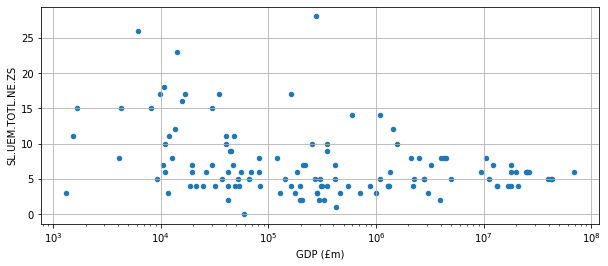

In [44]:
%matplotlib inline
gdpVsUnmp.plot(x=GDP, y=UNEMPLOYMENT, kind='scatter', grid=True, logx=True, figsize=(10, 4))

The plot shows there is no clear correlation: there are rich countries with low life expectancy, poor countries with high expectancy, and countries with around 10 thousand (104) million pounds GDP have almost the full range of values, from below 50 to over 80 years. Towards the lower and higher end of GDP, the variation diminishes. Above 40 thousand million pounds of GDP (3rd tick mark to the right of 104), most countries have an expectancy of 70 years or more, whilst below that threshold most countries' life expectancy is below 70 years.

Comparing the 10 poorest countries and the 10 countries with the lowest life expectancy shows that total GDP is a rather crude measure. The population size should be taken into account for a more precise definiton of what 'poor' and 'rich' means. Furthermore, looking at the countries below, droughts and internal conflicts may also play a role in life expectancy.

In [46]:
# the 10 countries with lowest GDP
gdpVsUnmp.sort_values(GDP).head(10)

,Country Name,GDP (£m),SL.UEM.TOTL.NE.ZS
107,Seychelles,1326,3
22,Cabo Verde,1543,11
64,St. Lucia,1653,15
13,Barbados,4056,8
80,Montenegro,4316,15
122,Kosovo,6172,26
100,Rwanda,8063,15
74,Moldova,9320,5
77,North Macedonia,9771,17
14,Brunei Darussalam,10489,7


In [48]:
# the 10 countries with the lowest eunmployment rate
gdpVsUnmp.sort_values(UNEMPLOYMENT).head(10)

,Country Name,GDP (£m),SL.UEM.TOTL.NE.ZS
79,Myanmar,59250,0
110,Thailand,423277,1
92,Philippines,293421,2
120,Vietnam,203965,2
73,"Macao SAR, China",41942,2
59,Japan,3957318,2
1,United Arab Emirates,327955,2
25,Czech Republic,195212,2
78,Malta,11673,3
107,Seychelles,1326,3


Conclusions
To sum up, there is no strong correlation between a country's wealth and the life expectancy of its inhabitants: there is often a wide variation of life expectancy for countries with similar GDP, countries with the lowest life expectancy are not the poorest countries, and countries with the highest expectancy are not the richest countries. Nevertheless there is some relationship, because the vast majority of countries with a life expectancy below 70 years is on the left half of the scatterplot.

Using the NY.GDP.PCAP.PP.CD indicator, GDP per capita in current 'international dollars', would make for a better like-for-like comparison between countries, because it would take population and purchasing power into account. Using more specific data, like expediture on health, could also lead to a better analysis.